<a href="https://colab.research.google.com/github/EitanBakirov/Economics-Data-Science/blob/main/Web_Scraping_and_APIs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Web Scraping and APIs for Data Scientists

### Motivation

In the world of data science, being able to get and use data from the web is very important. Two key methods that help data scientists do this are web scraping and APIs (Application Programming Interfaces). This notebook is a complete guide for beginners, showing how to gather useful data from websites and online services. Whether you need data for research, to build a dataset for machine learning, or to automate repetitive tasks, learning web scraping and APIs will be very helpful. With practical examples, pictures, and clear steps, this guide will teach you the basics and get you started in the data-rich world of the web.

### Overview of Web Scraping and APIs

- **Web Scraping**: Web scraping is a technique used to extract data from websites. It involves fetching the HTML of a webpage and then parsing it to find the necessary information. This is useful when there is no API available, or when the data you need is only displayed on a webpage.
  - **Use Cases**: Gathering product information from e-commerce sites, collecting social media posts, extracting news articles, etc.
  - **Common Tools**: BeautifulSoup, Scrapy, Selenium






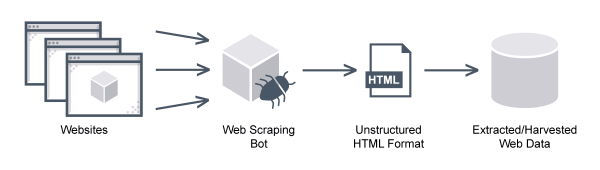

- **APIs**: An API is a set of rules and protocols that allows different software applications to communicate with each other. Many websites and services provide APIs that allow you to programmatically request and retrieve data.
  - **Use Cases**: Accessing structured data from services like Spotify, Twitter (X), weather information, stock prices, etc.
  - **Common Tools**: Requests library, Postman, various language-specific libraries

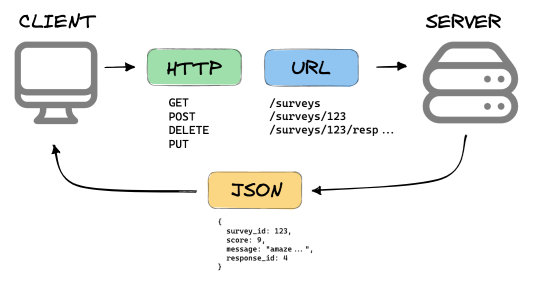

### Importance in Data Science

Web scraping and APIs are essential skills for data scientists for several reasons:

1. **Data Availability**: Much of the data needed for analysis, model building, or business intelligence is available on the web.
2. **Automation**: These techniques allow for the automated collection of large datasets, saving time and effort compared to manual data collection.
3. **Customization**: By using web scraping and APIs, you can tailor the data collection process to your specific needs, gathering only the information relevant to your project.
4. **Integration**: Combining data from multiple sources (both scraped data and API data) can provide a more comprehensive dataset for deeper insights and more robust models.

With this understanding, let's dive into setting up our environment and getting started with web scraping and APIs.

# Getting Started



## Setting Up Your Environment




TODO Maybe split the imports and libraries to API and Web Scraping specifically

### Installing Necessary Libraries

Before we dive into web scraping and APIs, we need to set up our environment by installing some essential libraries. These libraries will help us fetch and process data from the web.

The main libraries we will use are:
- **BeautifulSoup**: For parsing HTML and extracting data from web pages.
- **Requests**: For making HTTP requests to web servers.
- **Selenium**: For automating web browsers (useful for scraping dynamic content).
- **Pandas**: For data manipulation and analysis.
- **JSON**: For handling JSON data (commonly returned by APIs).

Let's install these libraries. If you are using Google Colab, these can be installed using pip:

In [ ]:
# Installing necessary libraries
!pip install beautifulsoup4 requests selenium pandas

Let's start by verifying the installation of our libraries and exploring a simple example.

In [ ]:
# Importing necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Verifying the installations
print("Libraries installed and ready to use!")


Libraries installed and ready to use!


In the next sections, we will explore web scraping in detail, starting with understanding HTML structure and how to navigate it using BeautifulSoup.

# Web Scraping



## What is Web Scraping?

Web scraping is a technique used to extract data from websites. It involves fetching the HTML of a webpage and then parsing it to find the necessary information. This is useful when there is no API available, or when the data you need is only displayed on a webpage.



### Ethical Considerations and Legal Aspects
TODO Maybe move down...
Before you start web scraping, it’s important to consider the ethical and legal implications:
- **Respect Website Terms of Service**: Always check a website’s terms of service to ensure you are not violating any rules.
- **Be Polite**: Avoid making too many requests in a short period. Use delays between requests to prevent overloading the server.
- **Use an API if Available**: If a website provides an API, use it instead of scraping. APIs are designed for data access and are often more efficient and reliable. (we will explore APIs later)




## Basic Concepts



Before diving into practical web scraping, there are several concepts you should be familiar with in order to succeed in scraping data from webpages.

### HTML Structure

Web pages are structured using HTML (HyperText Markup Language). Understanding the basic structure of HTML is crucial for web scraping.

Here's a simple example of an HTML structure:

```html
<!DOCTYPE html>
<html>
<head>
    <title>Sample Page</title>
</head>
<body>
    <h1>Welcome to the Sample Page</h1>
    <p>This is a sample paragraph.</p>
    <div class="content">
        <p>More content here.</p>
    </div>
</body>
</html>
```

Let's take a look at a simple webpage:<br>
https://phet-dev.colorado.edu/html/build-an-atom/0.0.0-3/simple-text-only-test-page.html

As you can see, an HTML webpage is constructed of tags '<>' which are the base of this language.

Some of the basic tags most webpages consist of:
- `<!DOCTYPE html>`: Declares the document type and version of HTML.
- `<html>`: The root element that encompasses all other HTML elements.
- `<head>`: Contains meta-information about the document, such as its title and links to stylesheets.
- `<title>`: Sets the title of the webpage, which appears in the browser tab.
- `<body>`: Contains the content of the HTML document that is displayed to the user.
- `<h1>`: Represents a top-level heading. There are six levels of headings (`<h1>` to `<h6>`), with `<h1>` being the highest.
- `<p>`: Defines a paragraph of text.
- `<a>`: Creates a hyperlink. The `href` attribute specifies the URL of the link.
- `<img>`: Embeds an image. The `src` attribute specifies the path to the image, and the `alt` attribute provides alternative text for the image.
- `<ul>`: Creates an unordered (bulleted) list.
- `<li>`: Defines a list item within a list. Used inside both `<ul>` (unordered list) and `<ol>` (ordered list).
- `<ol>`: Creates an ordered (numbered) list.

Also, as seen before, each tag must be closed after used, for example:
```html
<title>Sample Page</title>
```

To see the HTML code of a webpage you can right-click anywhere on the screen and choose "Inspect" and the code will show up on the side of the page:

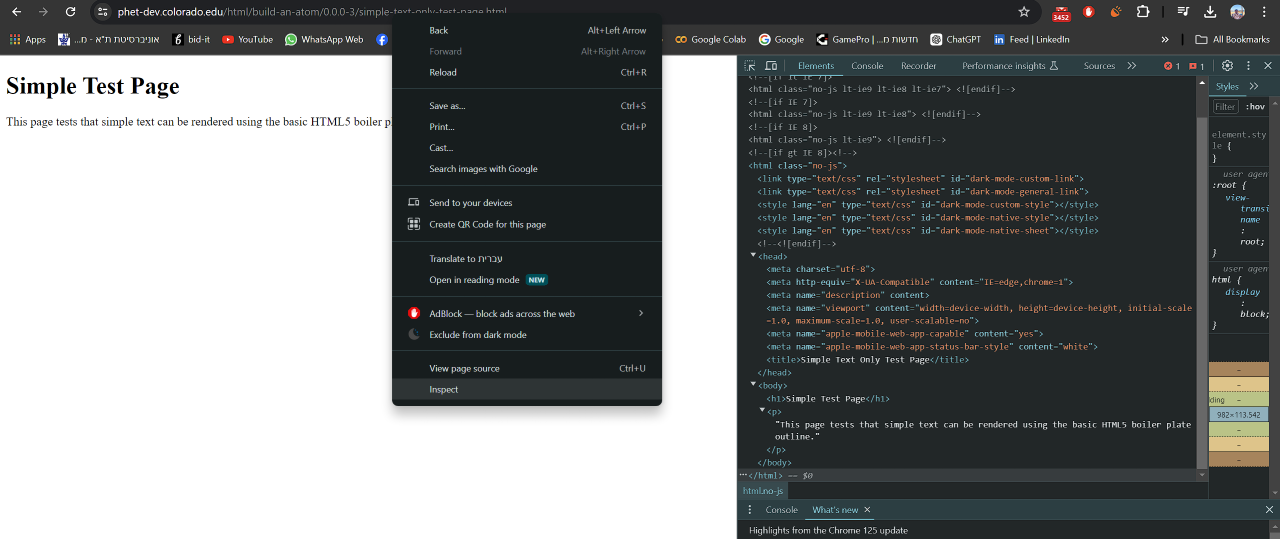

We can see all the text shown in the webpage is between the tags we have just learnt.

### CSS



When it comes to web scraping, understanding CSS is important because it helps you to navigate and extract the content you need from web pages.
<br>
<br>

CSS (Cascading Style Sheets) is a stylesheet language used to describe the presentation of a document written in HTML or XML. It controls the layout and appearance of web pages, enabling web designers to separate content from design.

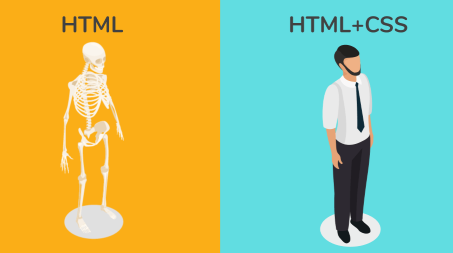

Now that we understand CSS, let's explore CSS selectors for web scraping. They help us target specific HTML elements by type, class, ID, or attributes, making data extraction precise and efficient. CSS selectors simplify validation and integrate smoothly with scraping libraries, automating content retrieval effectively.

#### Basic CSS Selectors

CSS (Cascading Style Sheets) selectors are used to select and style HTML elements.

- **Element Selector**: Selects all elements of a given type. For example, `p` selects all `<p>` elements.
- **Class Selector**: Selects all elements with a given class. For example, `.classname` selects all elements with `class="classname"`.
- **ID Selector**: Selects the element with a given ID. For example, `#idname` selects the element with `id="idname"`.
- **Attribute Selector**: Selects elements with a specific attribute. For example, `a[href="https://example.com"]` selects all `<a>` elements with `href="https://example.com"`.


### Tools and Libraries for Web Scraping

When diving into the realm of web scraping, there are numerous approaches to achieve the same goal. Web scraping can be accomplished through dedicated applications, browser extensions, and code libraries.

Let's explore a few tools that enable this process:

### 1. Dedicated Applications

- **ParseHub**: A web-based application that simplifies web scraping by providing a visual interface for data extraction.
- **Import.io**: Another web-based tool that allows users to create web scrapers without writing code.
- **Octoparse**: A cloud-based platform that offers a user-friendly interface for scraping data from websites.

### 2. Browser Extensions

- **Web Scraper (Chrome extension)**: A popular extension that enables users to extract data from websites directly within their Chrome browser.
- **Scraper (Firefox extension)**: A similar extension for Firefox users, providing a convenient way to scrape data from web pages.

### 3. Code Libraries

#### <u>Python</u>
- **BeautifulSoup**: A powerful library for parsing HTML/XML documents, making it easier to navigate and extract data.
- **Scrapy**: A comprehensive web scraping framework that provides a high-level API for extracting data from websites.
- **Selenium**: A tool primarily used for browser automation but can also be employed for web scraping, particularly for JavaScript-heavy websites.

#### <u>JavaScript/Node.js</u>
- **Puppeteer**: A Node.js library for controlling a headless Chrome browser, enabling web scraping of dynamic and JavaScript-rendered content.
- **Cheerio**: A jQuery-like library for parsing and manipulating HTML/XML data within Node.js applications.

### 4. Command-Line Tools</u>
- **cURL**: A versatile command-line tool for transferring data, supporting multiple protocols, though additional parsing tools are often needed.

- **Wget**: A simple tool for non-interactive downloading of web content, good for basic scraping tasks or downloading entire websites.

<br>

These tools offer diverse approaches to web scraping, catering to various skill levels and project requirements. Whether you prefer a visual interface, browser-based solution, or coding libraries, there are options available to extract data from websites efficiently.

Since this is a beginner's guide to web scraping in Python, we'll focus on **<u>Beautiful Soup</u>**. This powerful and user-friendly library is perfect for parsing HTML and XML documents, making it easy for beginners to extract data from web pages effectively. By concentrating on Beautiful Soup, we can simplify the learning process and build a strong foundation in web scraping.

TODO continue only working BeautifulSoup

## Practical Examples


### Simple HTML Parsing with BeautifulSoup
Let's start with a basic example of using BeautifulSoup to parse HTML and extract data.

Let's start by looking at a basic HTML site and try to fetch some data from it:

https://phet-dev.colorado.edu/html/build-an-atom/0.0.0-3/simple-text-only-test-page.html

In [ ]:
import requests
from bs4 import BeautifulSoup

# Fetch the webpage
url = 'https://phet-dev.colorado.edu/html/build-an-atom/0.0.0-3/simple-text-only-test-page.html'
# url = 'http://web.simmons.edu/~grovesd/comm244/class/html-testing.html'
# url = 'https://github.com/dashboard'
# url = 'http://example.com'
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Extract the title of the page
title = soup.title.string
print('Page Title:', title)

# Extract all headers (h1, h2, h3, h4, h5, h6)
headers = soup.find_all(['h1', 'h2', 'h3', 'h4', 'h5', 'h6'])
for i, header in enumerate(headers, 1):
    print(f'{header.name.upper()} {i}:', header.text)

# Extract all paragraphs
paragraphs = soup.find_all('p')
for i, p in enumerate(paragraphs, 1):
    print(f'Paragraph {i}:', p.text)


Page Title: Simple Text Only Test Page
H1 1: Simple Test Page
Paragraph 1: This page tests that simple text can be rendered using the basic HTML5 boiler plate outline.


### Navigating and Scraping Complex Web Pages

For more complex pages, we can use CSS selectors to find elements.

In [ ]:
# Extract elements with class 'content'
content_divs = soup.select('.content')
for div in content_divs:
    print('Content:', div.text)

### Handling Dynamic Content with Selenium

When dealing with dynamic content, Selenium can be used to render JavaScript.

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

# Set up the Selenium WebDriver (using Chrome in this example)
driver = webdriver.Chrome()

# Navigate to the webpage
driver.get('http://example.com')

# Allow time for JavaScript to execute
time.sleep(5)

# Extract data
dynamic_content = driver.find_element(By.CLASS_NAME, 'dynamic')
print('Dynamic Content:', dynamic_content.text)

# Close the browser
driver.quit()

SessionNotCreatedException: Message: session not created: Chrome failed to start: exited normally.
  (session not created: DevToolsActivePort file doesn't exist)
  (The process started from chrome location /root/.cache/selenium/chrome/linux64/125.0.6422.141/chrome is no longer running, so ChromeDriver is assuming that Chrome has crashed.)
Stacktrace:
#0 0x56f0204cce3a <unknown>
#1 0x56f0201b645c <unknown>
#2 0x56f0201eb6f8 <unknown>
#3 0x56f0201e763b <unknown>
#4 0x56f020231b19 <unknown>
#5 0x56f020225253 <unknown>
#6 0x56f0201f51c7 <unknown>
#7 0x56f0201f5b3e <unknown>
#8 0x56f02049327b <unknown>
#9 0x56f020497327 <unknown>
#10 0x56f02047fdae <unknown>
#11 0x56f020497df2 <unknown>
#12 0x56f02046474f <unknown>
#13 0x56f0204bc128 <unknown>
#14 0x56f0204bc2fb <unknown>
#15 0x56f0204cbf6c <unknown>
#16 0x7ce47420cac3 <unknown>


## Data Cleaning and Storage

### Parsing and Cleaning Scraped Data


After extracting data, you may need to clean it for analysis.



In [ ]:
# Example of cleaning data using pandas
import pandas as pd

data = {'Paragraphs': [p.text for p in paragraphs]}
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


                                          Paragraphs
0  This page tests that simple text can be render...


## Storing Data in CSV, JSON, or Databases


You can store the cleaned data in various formats for later use.



In [ ]:
# Save to CSV
df.to_csv('scraped_data.csv', index=False)

# Save to JSON
df.to_json('scraped_data.json', orient='records')

With these examples and tools, you should be able to start scraping data from web pages. In the next section, we will explore APIs and how to use them to gather data.

## APIs



### What is an API?

An API (Application Programming Interface) is a set of rules and protocols that allows different software applications to communicate with each other. APIs provide a way for developers to interact with an external service using a predefined set of commands.



### Types of APIs

- **REST APIs**: Representational State Transfer (REST) APIs use HTTP requests to perform CRUD (Create, Read, Update, Delete) operations. They are stateless and use standard HTTP methods like GET, POST, PUT, DELETE.

- **GraphQL APIs**: GraphQL APIs allow clients to request exactly the data they need. Unlike REST, which requires multiple endpoints, GraphQL uses a single endpoint to fetch data.



### Understanding API Documentation

API documentation provides information on how to use the API, including available endpoints, request methods, required parameters, and example responses. Key sections to look for:
- **Authentication**: Methods to authenticate requests (API keys, OAuth tokens).
- **Endpoints**: URLs for accessing different parts of the API.
- **Parameters**: Required and optional parameters for each endpoint.
- **Response Format**: Structure of the data returned by the API (usually JSON).



### Tools and Libraries for API Interaction
TODO expand on HTTP Requests (maybe even before this section)
- **Requests**: A popular Python library for making HTTP requests. (As we have already seen in Web Scraping)
- **Postman**: A tool for testing and interacting with APIs, useful for understanding API behavior and responses.



### Practical Examples



#### Making Simple API Calls

Let's start with a simple example of making a GET request to an API using the Requests library.



```python
import requests

# Define the API endpoint and parameters
url = 'https://api.example.com/data'
params = {'key': 'your_api_key', 'query': 'example'}

# Make the GET request
response = requests.get(url, params=params)

# Check the status code
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()
    print(data)
else:
    print(f'Error: {response.status_code}')


TODO Add a practical simple example of using API (Spotify or the HTML Dan sent us)

## Handling API Responses

APIs typically return data in JSON format. Here's how to handle and parse JSON responses.



In [ ]:
# Assuming response is the result of requests.get()

# Parse the JSON response
data = response.json()

# Access specific fields
item = data['items'][0]
name = item['name']
print('Name:', name)


## Pagination and Rate Limiting

Many APIs paginate their responses to limit the amount of data returned in a single request. Here's how to handle pagination.



In [ ]:
# Initialize parameters
url = 'https://api.example.com/data'
params = {'key': 'your_api_key', 'query': 'example', 'page': 1}

# Loop to handle pagination
all_data = []
while True:
    response = requests.get(url, params=params)
    if response.status_code != 200:
        break

    data = response.json()
    all_data.extend(data['items'])

    # Check for next page
    if 'next_page' in data:
        params['page'] += 1
    else:
        break

print(f'Total items fetched: {len(all_data)}')


## Combining Web Scraping and APIs

### Integrating Data from Web Scraping and APIs

Combining data from web scraping and APIs can provide a richer and more comprehensive dataset. This approach allows you to fill in gaps where one method alone might fall short. Here, we will discuss how to effectively integrate data from both sources.

### Practical Examples

#### Example 1: Enhancing Product Data

Imagine you are building a product comparison tool. You might scrape product details from an e-commerce website and then use an API to get additional information, such as customer reviews or ratings.

**Step 1: Scrape Product Details**

```python
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Scrape product details from an e-commerce site
url = 'http://example-ecommerce.com/products'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Extract product information
products = []
for item in soup.select('.product-item'):
    name = item.select_one('.product-name').text
    price = item.select_one('.product-price').text
    product_id = item['data-id']
    products.append({'product_id': product_id, 'name': name, 'price': price})

df_products = pd.DataFrame(products)
print(df_products)


TODO The main goal of this section is to only compare between the two (no code needed in my opinion) -

 https://medium.com/analytics-vidhya/render-html-template-on-google-colab-1532763234e3


# Bibliography

1. **Author(s)**. (Year). *Title of the Paper/Book*. Publisher. DOI/URL (if applicable).
2. **Author(s)**. (Year). *Title of the Paper/Book*. Publisher. DOI/URL (if applicable).
3. **Author(s)**. (Year). *Title of the Paper/Book*. Publisher. DOI/URL (if applicable).

### Example

1. **Smith, J.**. (2020). *Introduction to Machine Learning*. Tech Publishers. [https://doi.org/10.1234/ml](https://doi.org/10.1234/ml)
2. **Doe, A., & Roe, J.**. (2018). *Data Science for Beginners*. DataSci Press. [https://doi.org/10.5678/ds](https://doi.org/10.5678/ds)
3. **Johnson, L.**. (2015). *Python Programming Essentials*. CodeMaster Press. [https://doi.org/10.9101/py](https://doi.org/10.9101/py)
